In [ ]:
#install dependencies 
!pip install scikit-learn

In [ ]:
#install dependencies 
!pip install imbalanced-learn

In [ ]:
#check scikit-learn version
import sklearn
print(sklearn.__version__)

1.8.0


In [ ]:
#import necessary libraries
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    roc_auc_score,
    confusion_matrix,
    classification_report,
    roc_curve
)

from imblearn.over_sampling import SMOTE

In [ ]:
# Charger le dataset 
data = pd.read_csv(r"C:\Users\HP\Project_Data_Science\creditcard.csv")

In [ ]:
#affichage de dataset
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [ ]:
#affichage de ligne et colonnes de dataset
print("Nombre de lignes :", data.shape[0])
print("Nombre de colonnes :", data.shape[1])

Nombre de lignes : 284807
Nombre de colonnes : 31


In [ ]:
#types de données dans le dataset
data.dtypes

Time      float64
V1        float64
V2        float64
V3        float64
V4        float64
V5        float64
V6        float64
V7        float64
V8        float64
V9        float64
V10       float64
V11       float64
V12       float64
V13       float64
V14       float64
V15       float64
V16       float64
V17       float64
V18       float64
V19       float64
V20       float64
V21       float64
V22       float64
V23       float64
V24       float64
V25       float64
V26       float64
V27       float64
V28       float64
Amount    float64
Class       int64
dtype: object

In [ ]:
#vérification des valeurs manquantes
data.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [ ]:
#vérification des doublons
data.duplicated().sum()

1081

In [ ]:
#Distribution de la variable cible
data['Class'].value_counts()

Class
0    284315
1       492
Name: count, dtype: int64

In [ ]:
#Pourcentage de fraudes
data['Class'].value_counts(normalize=True) * 100

Class
0    99.827251
1     0.172749
Name: proportion, dtype: float64

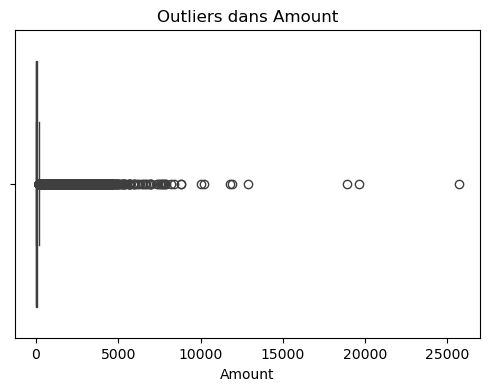

In [ ]:
#Visualisation des outliers dans la variable Amount
plt.figure(figsize=(6,4))
sns.boxplot(x=data['Amount'])
plt.title("Outliers dans Amount")
plt.show()

In [14]:
#Nettoyage (suppression des doublons)
data = data.drop_duplicates()

In [ ]:
#Séparation des caractéristiques et de la cible
X = data.drop('Class', axis=1)
y = data['Class']

In [ ]:
#Normalisation de la variable Amount
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [ ]:
#Division des données en ensembles d'entraînement et de test avec stratification
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y,
    test_size=0.3,
    random_state=42,
    stratify=y
)

In [ ]:
#Application de SMOTE pour équilibrer les classes dans l'ensemble d'entraînement
smote = SMOTE(random_state=42)
X_train, y_train = smote.fit_resample(X_train, y_train)

pd.Series(y_train).value_counts()

Class
0    198277
1    198277
Name: count, dtype: int64

In [19]:
#Statistiques descriptives
data.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,...,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000
mean,94811.077600,0.005917,-0.004135,0.001613,-0.002966,0.001828,-0.001139,0.001801,-0.000854,-0.001596,...,-0.000371,-0.000015,0.000198,0.000214,-0.000232,0.000149,0.001763,0.000547,88.472687,0.001667
std,47481.047891,1.948026,1.646703,1.508682,1.414184,1.377008,1.331931,1.227664,1.179054,1.095492,...,0.723909,0.724550,0.623702,0.605627,0.521220,0.482053,0.395744,0.328027,250.399437,0.040796
min,0.000000,-56.407510,-72.715728,-48.325589,-5.683171,-113.743307,-26.160506,-43.557242,-73.216718,-13.434066,...,-34.830382,-10.933144,-44.807735,-2.836627,-10.295397,-2.604551,-22.565679,-15.430084,0.000000,0.000000
25%,54204.750000,-0.915951,-0.600321,-0.889682,-0.850134,-0.689830,-0.769031,-0.552509,-0.208828,-0.644221,...,-0.228305,-0.542700,-0.161703,-0.354453,-0.317485,-0.326763,-0.070641,-0.052818,5.600000,0.000000
50%,84692.500000,0.020384,0.063949,0.179963,-0.022248,-0.053468,-0.275168,0.040859,0.021898,-0.052596,...,-0.029441,0.006675,-0.011159,0.041016,0.016278,-0.052172,0.001479,0.011288,22.000000,0.000000
75%,139298.000000,1.316068,0.800283,1.026960,0.739647,0.612218,0.396792,0.570474,0.325704,0.595977,...,0.186194,0.528245,0.147748,0.439738,0.350667,0.240261,0.091208,0.078276,77.510000,0.000000
max,172792.000000,2.454930,22.057729,9.382558,16.875344,34.801666,73.301626,120.589494,20.007208,15.594995,...,27.202839,10.503090,22.528412,4.584549,7.519589,3.517346,31.612198,33.847808,25691.160000,1.000000


In [20]:
# Informations générales sur le dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 283726 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    283726 non-null  float64
 1   V1      283726 non-null  float64
 2   V2      283726 non-null  float64
 3   V3      283726 non-null  float64
 4   V4      283726 non-null  float64
 5   V5      283726 non-null  float64
 6   V6      283726 non-null  float64
 7   V7      283726 non-null  float64
 8   V8      283726 non-null  float64
 9   V9      283726 non-null  float64
 10  V10     283726 non-null  float64
 11  V11     283726 non-null  float64
 12  V12     283726 non-null  float64
 13  V13     283726 non-null  float64
 14  V14     283726 non-null  float64
 15  V15     283726 non-null  float64
 16  V16     283726 non-null  float64
 17  V17     283726 non-null  float64
 18  V18     283726 non-null  float64
 19  V19     283726 non-null  float64
 20  V20     283726 non-null  float64
 21  V21     283726 

In [21]:
# Vérifier la distribution des classes
data['Class'].value_counts()

Class
0    283253
1       473
Name: count, dtype: int64

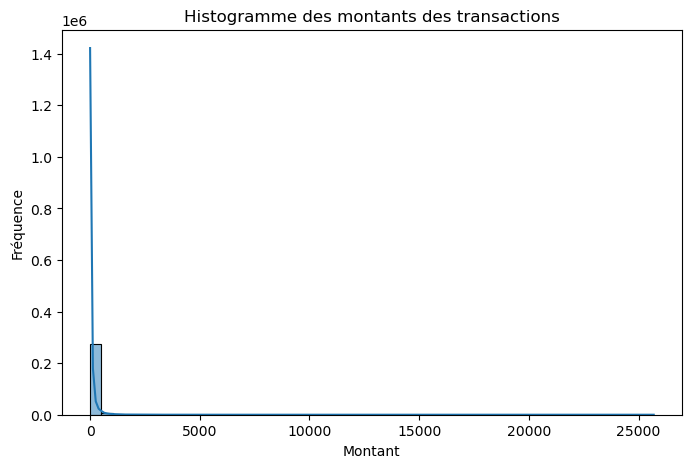

In [ ]:
# Visualisation de la distribution des montants des transactions
plt.figure(figsize=(8,5))
sns.histplot(data['Amount'], bins=50, kde=True)
plt.title("Histogramme des montants des transactions")
plt.xlabel("Montant")
plt.ylabel("Fréquence")
plt.show()

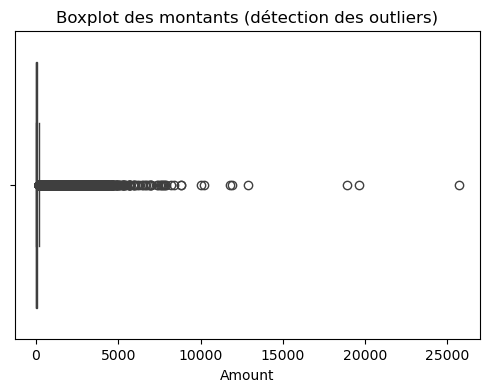

In [ ]:
# Boxplot pour détecter les outliers dans la variable Amount
plt.figure(figsize=(6,4))
sns.boxplot(x=data['Amount'])
plt.title("Boxplot des montants (détection des outliers)")
plt.show()

C:\Users\HP\anaconda3\envs\tp_python\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


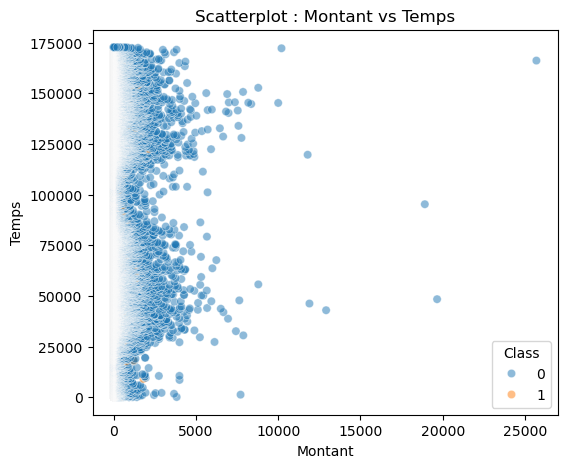

In [ ]:
# Scatterplot Montant vs Temps
plt.figure(figsize=(6,5))
sns.scatterplot(x='Amount', y='Time', hue='Class', data=data, alpha=0.5)
plt.title("Scatterplot : Montant vs Temps")
plt.xlabel("Montant")
plt.ylabel("Temps")
plt.show()

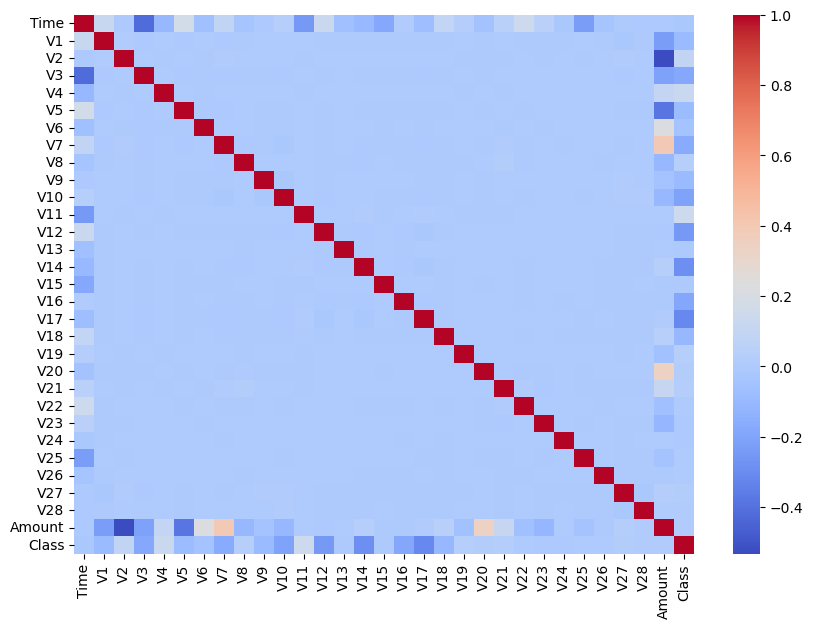

In [ ]:
# Heatmap de la corrélation entre les variables
plt.figure(figsize=(10,7))
sns.heatmap(data.corr(), cmap='coolwarm')
plt.show()

In [26]:
# Corrélation avec la variable cible
correlation_class = data.corr()['Class'].sort_values(ascending=False)
correlation_class

Class     1.000000
V11       0.149067
V4        0.129326
V2        0.084624
V19       0.033631
V8        0.033068
V21       0.026357
V27       0.021892
V20       0.021486
V28       0.009682
Amount    0.005777
V22       0.004887
V26       0.004265
V25       0.003202
V15      -0.003300
V13      -0.003897
V23      -0.006333
V24      -0.007210
Time     -0.012359
V6       -0.043915
V5       -0.087812
V9       -0.094021
V1       -0.094486
V18      -0.105340
V7       -0.172347
V3       -0.182322
V16      -0.187186
V10      -0.206971
V12      -0.250711
V14      -0.293375
V17      -0.313498
Name: Class, dtype: float64

In [27]:
# Variables les plus corrélées avec la classe
correlation_class.head(10)

Class    1.000000
V11      0.149067
V4       0.129326
V2       0.084624
V19      0.033631
V8       0.033068
V21      0.026357
V27      0.021892
V20      0.021486
V28      0.009682
Name: Class, dtype: float64

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
import pandas as pd

X = data.drop('Class', axis=1)
y = data['Class']

# Séparation train / test
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

# Normalisation
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Rééquilibrage avec SMOTE (UNIQUEMENT sur le train)
smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train_scaled, y_train)

In [ ]:
# Entraînement et évaluation d'un modèle de régression logistique
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

log_reg = LogisticRegression(max_iter=1000, random_state=42)
log_reg.fit(X_train_res, y_train_res)

y_pred_log = log_reg.predict(X_test_scaled)
y_proba_log = log_reg.predict_proba(X_test_scaled)[:, 1]

print("=== Logistic Regression ===")
print(confusion_matrix(y_test, y_pred_log))
print(classification_report(y_test, y_pred_log))

=== Logistic Regression ===
[[55169  1482]
 [   12    83]]
              precision    recall  f1-score   support

           0       1.00      0.97      0.99     56651
           1       0.05      0.87      0.10        95

    accuracy                           0.97     56746
   macro avg       0.53      0.92      0.54     56746
weighted avg       1.00      0.97      0.99     56746



In [ ]:
# Entraînement et évaluation d'un modèle SVM
from sklearn.svm import SVC

svm_model = SVC(kernel='rbf', probability=True, random_state=42)
svm_model.fit(X_train_res[:50000], y_train_res[:50000])

y_pred_svm = svm_model.predict(X_test_scaled)
y_proba_svm = svm_model.predict_proba(X_test_scaled)[:, 1]

print("=== SVM ===")
print(confusion_matrix(y_test, y_pred_svm))
print(classification_report(y_test, y_pred_svm))

=== SVM ===
[[56651     0]
 [   61    34]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56651
           1       1.00      0.36      0.53        95

    accuracy                           1.00     56746
   macro avg       1.00      0.68      0.76     56746
weighted avg       1.00      1.00      1.00     56746



In [ ]:
# Entraînement et évaluation d'un modèle KNN
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_res, y_train_res)

y_pred_knn = knn.predict(X_test_scaled)
y_proba_knn = knn.predict_proba(X_test_scaled)[:, 1]

print("=== KNN ===")
print(confusion_matrix(y_test, y_pred_knn))
print(classification_report(y_test, y_pred_knn))

=== KNN ===
[[56554    97]
 [   18    77]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56651
           1       0.44      0.81      0.57        95

    accuracy                           1.00     56746
   macro avg       0.72      0.90      0.79     56746
weighted avg       1.00      1.00      1.00     56746



In [ ]:
# Validation croisée pour évaluer la robustesse des modèles
from sklearn.model_selection import cross_val_score

cv_log = cross_val_score(log_reg, X_train_res, y_train_res, cv=5, scoring='f1')
cv_knn = cross_val_score(knn, X_train_res, y_train_res, cv=5, scoring='f1')

print("F1-score CV Logistic Regression :", cv_log.mean())
print("F1-score CV KNN :", cv_knn.mean())

F1-score CV Logistic Regression : 0.946082744764524
F1-score CV KNN : 0.9989882474000173


In [34]:
#Régression Logistique
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

print("Accuracy :", accuracy_score(y_test, y_pred_log))
print("Precision :", precision_score(y_test, y_pred_log))
print("Recall :", recall_score(y_test, y_pred_log))
print("F1-score :", f1_score(y_test, y_pred_log))

Accuracy : 0.9736721531033025
Precision : 0.053035143769968054
Recall : 0.8736842105263158
F1-score : 0.1


In [35]:
#Support Vector Machine (SVM)
print("Accuracy :", accuracy_score(y_test, y_pred_svm))
print("Precision :", precision_score(y_test, y_pred_svm))
print("Recall :", recall_score(y_test, y_pred_svm))
print("F1-score :", f1_score(y_test, y_pred_svm))

Accuracy : 0.9989250343636555
Precision : 1.0
Recall : 0.35789473684210527
F1-score : 0.5271317829457365


In [36]:
#K-Nearest Neighbors (KNN)
print("Accuracy :", accuracy_score(y_test, y_pred_knn))
print("Precision :", precision_score(y_test, y_pred_knn))
print("Recall :", recall_score(y_test, y_pred_knn))
print("F1-score :", f1_score(y_test, y_pred_knn))

Accuracy : 0.9979734254396786
Precision : 0.4425287356321839
Recall : 0.8105263157894737
F1-score : 0.5724907063197026


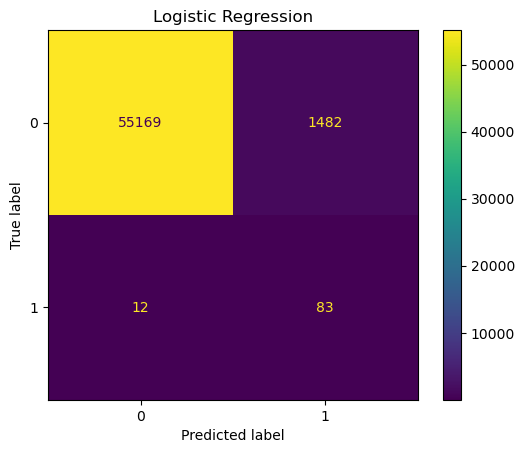

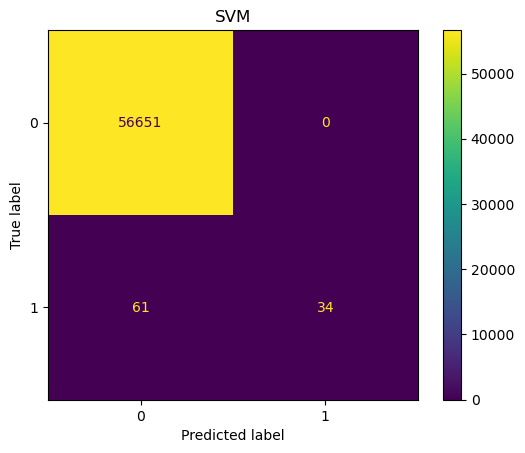

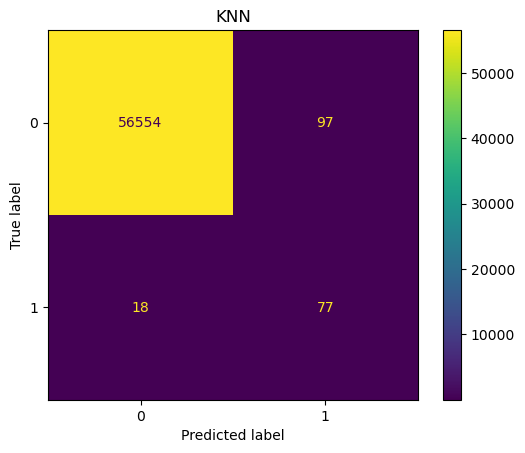

In [37]:
#Visualisation : Matrice de confusion
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay

models = {
    "Logistic Regression": y_pred_log,
    "SVM": y_pred_svm,
    "KNN": y_pred_knn
}

for name, y_pred in models.items():
    disp = ConfusionMatrixDisplay.from_predictions(y_test, y_pred)
    disp.ax_.set_title(name)
    plt.show()

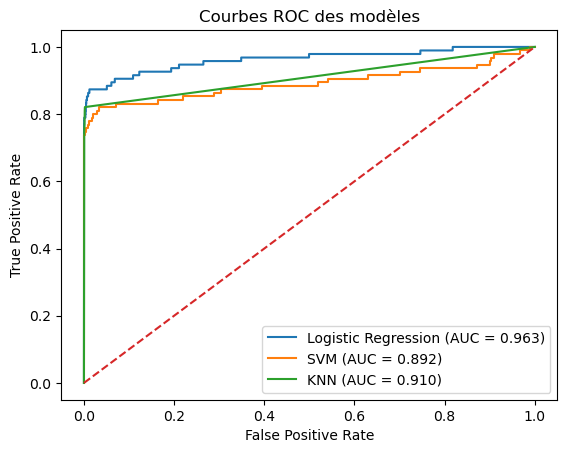

In [38]:
#courbes ROC et AUC
from sklearn.metrics import roc_curve, auc

plt.figure()

# Logistic Regression
fpr_log, tpr_log, _ = roc_curve(y_test, y_proba_log)
auc_log = auc(fpr_log, tpr_log)
plt.plot(fpr_log, tpr_log, label=f"Logistic Regression (AUC = {auc_log:.3f})")

# SVM
fpr_svm, tpr_svm, _ = roc_curve(y_test, y_proba_svm)
auc_svm = auc(fpr_svm, tpr_svm)
plt.plot(fpr_svm, tpr_svm, label=f"SVM (AUC = {auc_svm:.3f})")

# KNN
fpr_knn, tpr_knn, _ = roc_curve(y_test, y_proba_knn)
auc_knn = auc(fpr_knn, tpr_knn)
plt.plot(fpr_knn, tpr_knn, label=f"KNN (AUC = {auc_knn:.3f})")

plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Courbes ROC des modèles")
plt.legend()
plt.show()